Simon Müller s6simue@uni-bonn.de

Tomas Lordick s0thlord@uni-bonn.de

Mohamed Aborageh mohamed.salah1@aiesec.net


## Exercise 1

##### a)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import numpy as np

In [3]:
df = pd.read_excel("breast-cancer-wisconsin.xlsx") #read the data set
df=df.interpolate(method='nearest') #interpolate missing values

In [4]:
df=df.drop("code", axis=1) #drop the code column
df.head()
features = df.loc[:, list(df)[:-1]].values #split the data into features set and class set
klasse = df.loc[:, ["class"]].values

In [5]:
features_scaled = StandardScaler().fit_transform(features) # scaling the features set

In [6]:
pca = PCA() # doing the actual pca
principalComponents = pca.fit_transform(features_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [i for i in range(1,10)])

In [7]:
pca.fit(features_scaled) # fit teh data to the pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[ 65.4  74.   80.   85.2  89.4  92.8  96.1  99.  100. ]


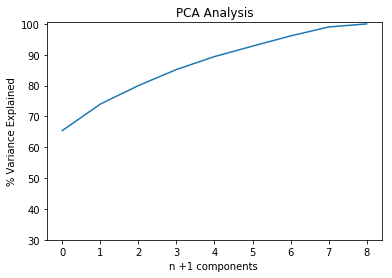

In [8]:
# plot the cumulated variance.
variance =pca.explained_variance_ratio_ # calculate variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100) #rounded to percentage

plt.ylabel('% Variance Explained')
plt.xlabel('n +1 components ')
plt.xticks([i for i in range(10)])
plt.title('PCA Analysis')
plt.ylim(30,100.5)
print (var)
plt.plot(var)

In [9]:
# the first 6 components are enough to cover >= 90 %.

b)

In [11]:
finalDf = pd.concat([principalDf, df[['class']]], axis = 1) #concatenate scaled features set and teh class set

In [12]:
finalDf.head()

,1,2,3,4,5,6,7,8,9,class
0,-1.458989,-0.103530,-0.577553,-0.023162,-0.151570,0.146176,0.300721,0.435618,-0.001557,2
1,1.457655,-0.553216,0.310822,-0.655750,1.691574,-0.561744,-0.924616,0.352840,0.012818,2
2,-1.582918,-0.073038,0.040621,-0.100203,-0.067063,-0.211299,0.273373,0.233932,0.015796,2
3,1.501772,-0.545678,-0.649455,1.431360,-0.447196,-0.159949,-0.236603,-1.593375,0.186781,2
4,-1.333143,-0.085412,0.028890,-0.300618,-0.151717,0.515047,0.160909,0.435507,-0.034480,2


In [13]:
first_five=finalDf.drop(columns=[6,7,8,9]) # drop the components 6,7,8,9 to keep the first five

In [14]:
first_five.head()

,1,2,3,4,5,class
0,-1.458989,-0.103530,-0.577553,-0.023162,-0.151570,2
1,1.457655,-0.553216,0.310822,-0.655750,1.691574,2
2,-1.582918,-0.073038,0.040621,-0.100203,-0.067063,2
3,1.501772,-0.545678,-0.649455,1.431360,-0.447196,2
4,-1.333143,-0.085412,0.028890,-0.300618,-0.151717,2


F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


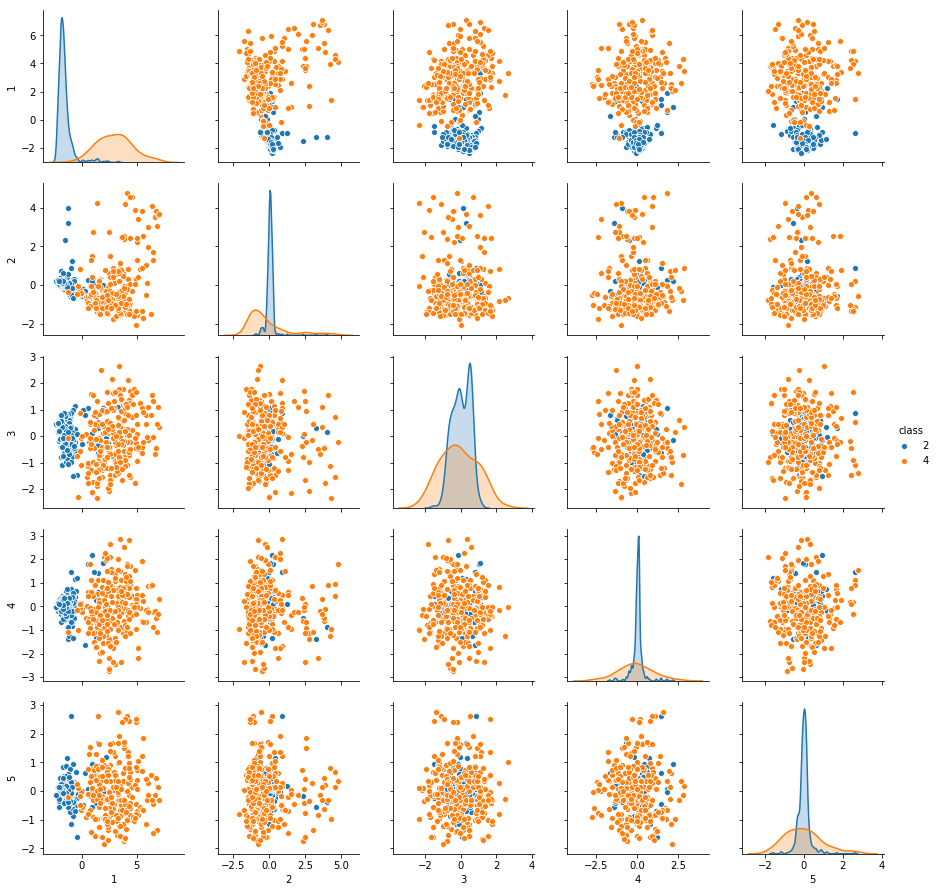

In [15]:
sb.pairplot(first_five,vars=[1,2,3,4,5], hue="class") #plot is using seaborn

In [16]:
print (pca.explained_variance_)
print (pd.DataFrame(pca.components_,columns=list(df)[:-1]))

[5.89047615 0.77744685 0.53964716 0.46827076 0.38087324 0.30774761
 0.29723871 0.26212251 0.089071  ]
   thickness   uniCelS  uniCelShape    marAdh  epiCelSize   bareNuc  \
0   0.302844  0.381430     0.377742  0.333094    0.336632  0.331780   
1  -0.142161 -0.047669    -0.083087 -0.046233    0.164846 -0.256308   
2  -0.862991  0.012783    -0.040017  0.427623    0.103621  0.017284   
3  -0.106419  0.206584     0.178597 -0.449796    0.372007 -0.554646   
4  -0.069211  0.136537     0.103516 -0.035302    0.682886  0.128276   
5   0.254525  0.142858     0.066324  0.655310   -0.085412 -0.641377   
6  -0.065129  0.186261     0.133115 -0.232489   -0.174851 -0.267513   
7   0.241196 -0.439179    -0.584973  0.122137    0.448963 -0.109863   
8   0.002544  0.736734    -0.664741 -0.045680   -0.067884  0.069606   

   blaChroma   normNuc   mitoses  
0   0.346282  0.336174  0.229855  
1  -0.229701  0.025845  0.906741  
2   0.194083  0.121386 -0.084739  
3   0.000763  0.451138 -0.249472  
4  -0.255242

In [17]:
# I am not sure what PCA "mode" means, but this would be my guess:
# The first component covers ~ 65 % of the variance. Its clearly visible in the first cell (index 1,1) of the plot.
# Regarding this component, we see that: 
# uniCelS shows the highest weight in the first principal component (~ 0.38)
# thickness reveals the lowest weight in the first principal component (0.30 )

d)

In [18]:
#outlier removal: row with index 1.
#Will probably not make any major difference. To archieve that, more outlier samples should be removed.
#Just to demonstrate:
first_five_removed=first_five.drop([1])

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


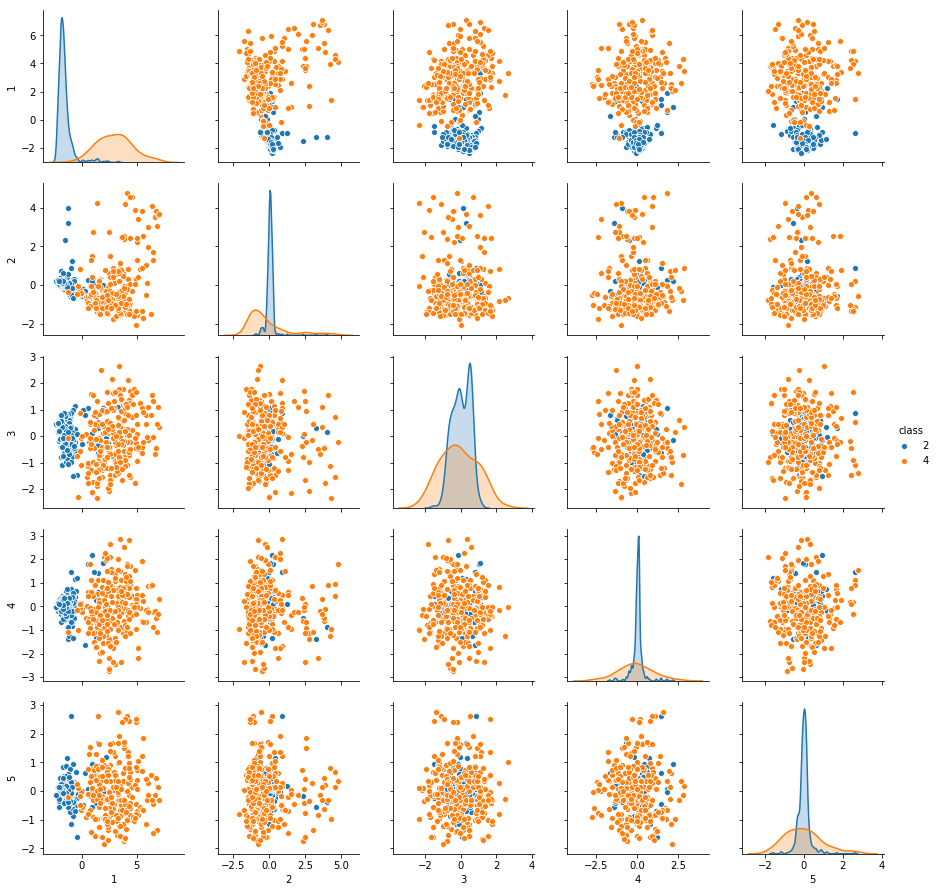

In [19]:
#replot
sb.pairplot(first_five,vars=[1,2,3,4,5], hue="class")

e)

Pre-processing is always necessary even for this dataset - that's why I've already made it as you can see in a).
We're doing that in order to remove mathematically the sources of unwanted variations (QUOTED). If the relationships between the variables analyzed are non-linear, the values of correlation coefficients can be lower. So, it is sometimes useful to transform the original variables prior to the Principal Component Analysis to "linearize" these relationships.

## Exercise 2

##### a)

- if you set the perplexity to 30, you have the same number of points which results in a uniform distribution that does not yield good results. This does not happen when perplexity < n, which explains the much better resutls
- t-SNE cares more about close neighbors than more distant data points. At the edges and corners you have more neighbors which pushes these points closer together
- a neighborhood of only two points is not enough to hold a square structure together
- perplexity has to be bigger than three. You have to look at enough neighbors around a point to bridge the gaps between the different circle elements. This does only happen if also look at points outside the local cluster.


##### b)

In [20]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

In [21]:
df = pd.read_excel('Data_Cortex_Nuclear.xls')
df = df.interpolate(limit_direction ='backward') 
sc_1 = df.loc[df.loc[:,"class"] == "t-CS-s", :]
sc_2 = df.loc[df.loc[:,"class"] == "c-CS-s", :]
df = pd.concat([sc_1, sc_2])
df_num = df.select_dtypes(['number'])
df_num.head()

print('Data len: ', len(df_num))

Data len:  240


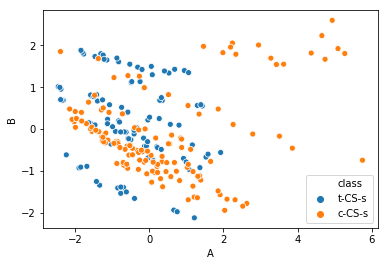

In [22]:
#PCA
pca = PCA(n_components=2)
df_red = pd.DataFrame(
    data=pca.fit_transform(df_num),
    columns=['A', 'B'],
    index=df_num.index
)
df_red['class'] = df['class']
sns.scatterplot(data=df_red, x='A', y='B', hue='class')

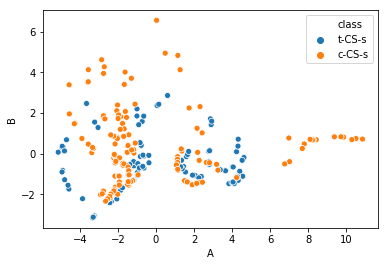

In [23]:
#isomap
iso = Isomap(10)
df_red = pd.DataFrame(
    data=iso.fit_transform(df_num),
    columns=['A', 'B'],
    index=df_num.index
)
df_red['class'] = df['class']
sns.scatterplot(data=df_red, x='A', y='B', hue='class')

I would choose the isomap visualization because it strechtes the data better along the x-axis which makes it more readable. Also it is easier to spot certain clusters.

##### c)

Generating plot with perplexity "5" and init-mode "random"
Generating plot with perplexity "10" and init-mode "random"
Generating plot with perplexity "20" and init-mode "random"
Generating plot with perplexity "30" and init-mode "random"
Generating plot with perplexity "40" and init-mode "random"
Generating plot with perplexity "5" and init-mode "pca"
Generating plot with perplexity "10" and init-mode "pca"
Generating plot with perplexity "20" and init-mode "pca"
Generating plot with perplexity "30" and init-mode "pca"
Generating plot with perplexity "40" and init-mode "pca"


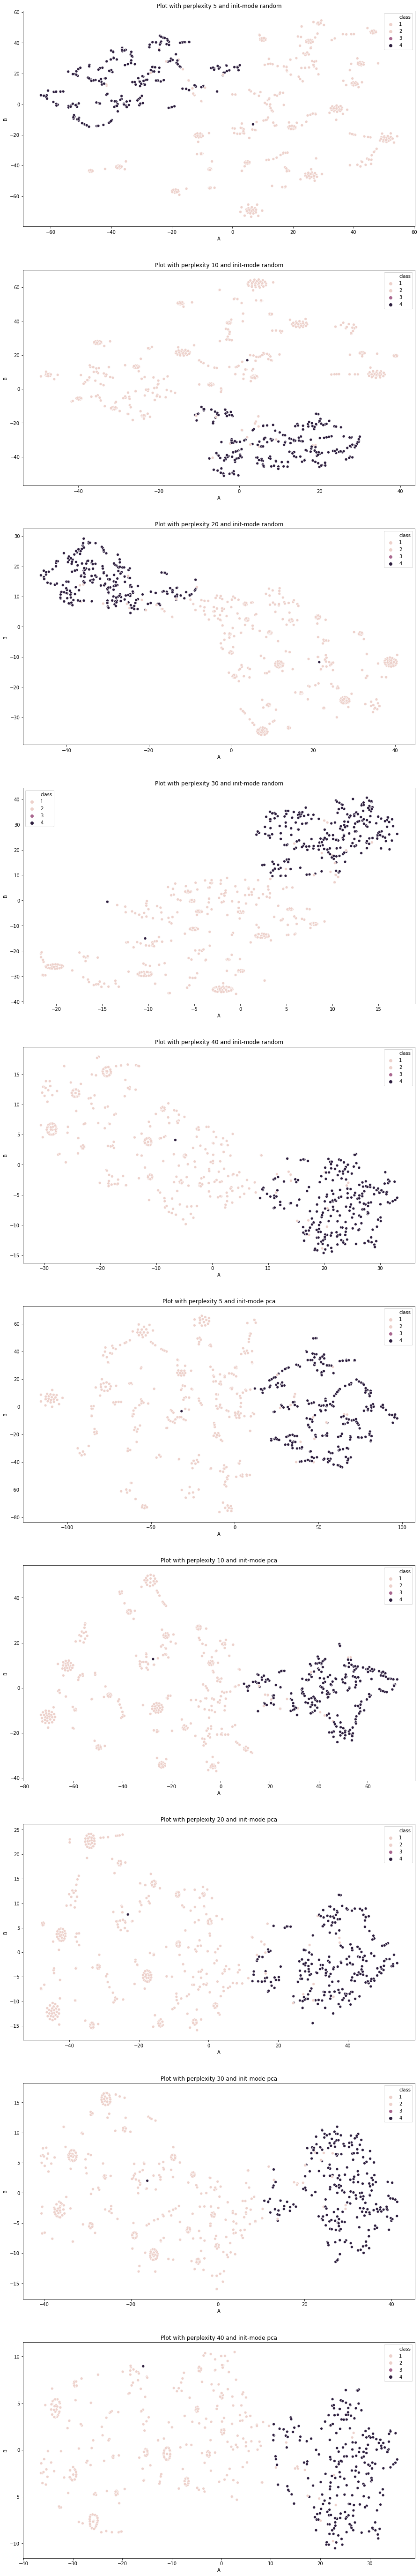

In [24]:
data = pd.read_excel('breast-cancer-wisconsin.xlsx')
data = data.drop('code', axis=1)
data = data.interpolate(limit_direction ='backward')
data_num = data.select_dtypes(['number'])
data_label = data['class']

inits = ['random', 'pca']
perplexity_params = [5, 10, 20, 30, 40]

fig, axs = plt.subplots(nrows=10, figsize=(15,100))
count = 0
for ini in inits:
    for perp in perplexity_params:
        print(f'Generating plot with perplexity "{perp}" and init-mode "{ini}"')
        tsne = TSNE(perplexity=perp, init=ini)
        data_red = pd.DataFrame(
            data=tsne.fit_transform(data_num),
            columns=['A', 'B'],
            index=data_num.index
        )
        data_red['class'] = data['class']
        sns.scatterplot(data=data_red, x='A', y='B', hue='class', ax=axs[count])
        axs[count].set_title(f'Plot with perplexity {perp} and init-mode {ini}')
        count += 1

## Exercise 3

##### a)

- First, given the two points xi & xj the probability Pij is computed to model the similarity between both points in high dimensional space.

- Second, a Student's t-Distribution with one degree of freedom is used to compute joint-probability distribution in lower dimension Q, where data positions should be optimized.

- Last, gradient of Kullback-Leibler divergence between P and Q is used to minimize cost function C.

A-tSNE introduces the approximations at initialization stage, by using approximated KNN computations to build the approximated high dimensional joint-probability distribution pA instead of exact distribution P. The cost function C is minimized to obtain the approximated embedding described by QA. The similarity between points is calculated with approximated neighbours NA, instead of exact neighborhood Ni.

##### b)

The idea of Progressive Visual Analysis is to provide intermediate results with which the user can start the analysis process, in case the computation of the final results is costly.

Given that the distances in high-dimensional space need to be precomputed to start minimization process, the initialization process could take time before the first intermediate result is generated, and any adjustment to data will force the user to wait for reinitialization.

A-tSNE approximates the distances using KNN queries instead of precomputing them. This allows the computation of iterative minimization to start instantly and immediate processing of data.

##### c)

As the data acquisition process could be imperfect, and the data could be incomplete or noisy and therefore data pre-processing is required.